In [48]:
import pandas as pd
data = pd.read_csv('~/Downloads/part_1.csv')

In [49]:
data[:10]

,Time,Ivanpah1_SUI-TAVG_DNR_Value,Ivanpah1_SUI-DRUM_PRESS_1AAPIT1105_PIT,Ivanpah1_SUI-SH_TOTAL_PV_OUT_TEMP,Ivanpah1_SUI-FEEDWATER_TO_SRSG_FLOW_SEL_1AEFIT0070_TXFR_,Ivanpah1_SUI-DOWNCOMER_FLOW_1AAFIT1052_COMP,Ivanpah1_SUI-MAIN_STEAM_FLOW_1AB_MS_FLOW_FLOW,Ivanpah1_SUI-PI_SG_MONITORING_STATE_SH_FLOW_RUNNING,Ivanpah1_SUI-SH_EN_PASS_2_STEAM_FLOW_1AAFIT4251_COMP,Ivanpah1_SUI-SH_WN_PASS_2_STEAM_FLOW_1AAFIT4651_COMP,Ivanpah1_SUI-PI_SG_MONITORING_STATE_MAX_STG_LOAD,Ivanpah1_SUI-ExpectedFlux_IMAGE,Ivanpah1_SUI-Processed_PotentialFlux,Ivanpah1_PI-1JU-STGMW-CASC-SP.TCS_OUT,Ivanpah1_SUI-CLOUD_STATUS_ClearSkyDNR
0,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01 00:01:00,NaN,2.366333,NaN,0.0,0.0,0.0,3.0,0.0,0.540159,3.0,NaN,0.0,NaN,0.0
2,2017-01-01 00:02:00,0.004826,2.366333,328.388885,0.0,0.0,0.0,3.0,0.0,0.561419,3.0,NaN,0.0,NaN,0.0
3,2017-01-01 00:03:00,0.004855,2.366333,328.277802,0.0,0.0,0.0,3.0,0.0,0.565986,3.0,NaN,0.0,NaN,0.0
4,2017-01-01 00:04:00,0.006227,2.366333,328.055542,0.0,0.0,0.0,3.0,0.0,0.572638,3.0,NaN,0.0,NaN,0.0
5,2017-01-01 00:05:00,0.006740,2.366333,328.000000,0.0,0.0,0.0,3.0,0.0,0.579400,3.0,NaN,0.0,NaN,0.0
6,2017-01-01 00:06:00,0.027129,2.366333,328.000000,0.0,0.0,0.0,3.0,0.0,0.564037,3.0,NaN,0.0,NaN,0.0
7,2017-01-01 00:07:00,0.131408,2.366333,327.777771,0.0,0.0,0.0,3.0,0.0,0.572540,3.0,NaN,0.0,NaN,0.0
8,2017-01-01 00:08:00,0.243151,2.343889,327.666687,0.0,0.0,0.0,3.0,0.0,0.571897,3.0,NaN,0.0,NaN,0.0
9,2017-01-01 00:09:00,0.307805,2.343889,327.555542,0.0,0.0,0.0,3.0,0.0,0.575168,3.0,NaN,0.0,NaN,0.0


<IPython.core.display.Javascript object>


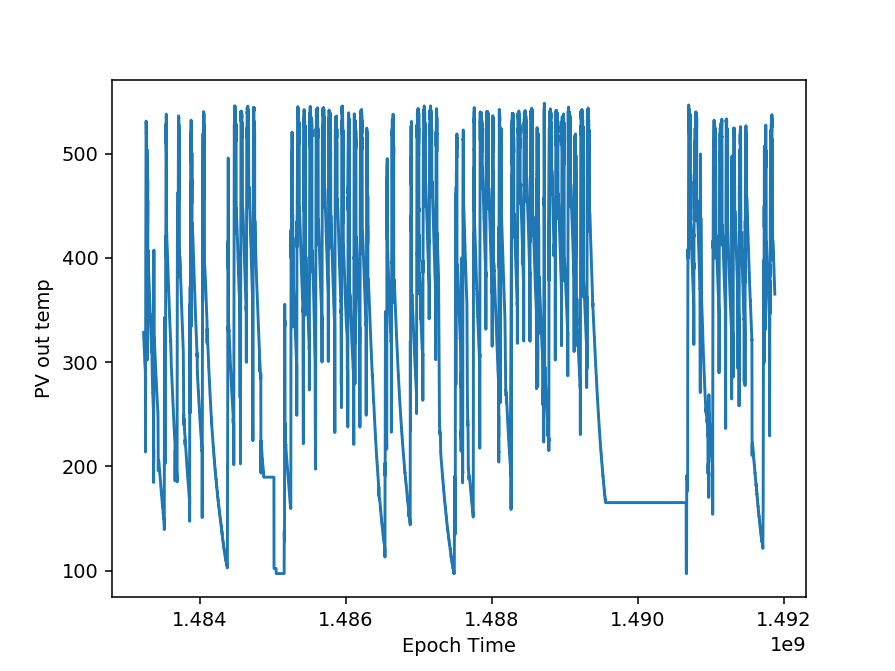

Text(0,0.5,u'PV out temp')

In [47]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

def str2epoch(t):
    utc_time = datetime.strptime(t , "%Y-%m-%d %H:%M:%S")
    epoch_time = (utc_time - datetime(1970, 1, 1)).total_seconds()
    return epoch_time
epoch_time = map(str2epoch, data['Time'])
plt.figure()
plt.plot(epoch_time, data['Ivanpah1_SUI-SH_TOTAL_PV_OUT_TEMP'])
plt.xlabel('Epoch Time')
plt.ylabel('PV out temp')

<IPython.core.display.Javascript object>


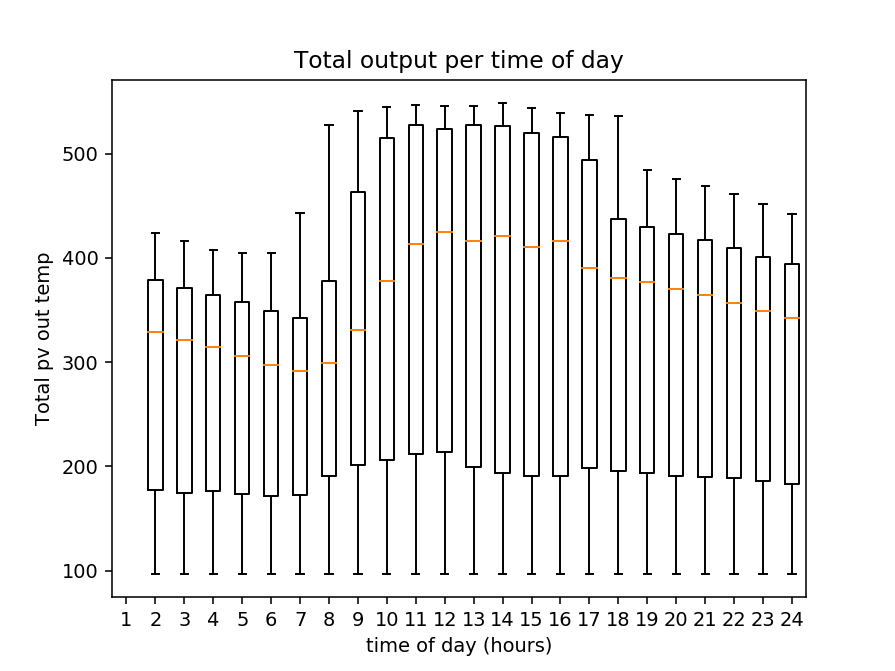

Text(0,0.5,u'Total pv out temp')

In [46]:
def str2timeofday(t):
    utc_time = datetime.strptime(t , "%Y-%m-%d %H:%M:%S")
    return utc_time.hour
epoch_time = np.array(map(str2timeofday, data['Time']))

binned_data = [data['Ivanpah1_SUI-SH_TOTAL_PV_OUT_TEMP'][epoch_time==i] for i in range(24)]
plt.figure()
plt.boxplot(binned_data)
plt.title('Total output per time of day')
plt.xlabel('time of day (hours)')
plt.ylabel('Total pv out temp')
